## Noise

### 1. Non-Stationary/Stationary signals

- Non-Stationary signals: the data distribution of a random/stochastic signal varies with time.

  Example: speech signals


- Stationary signals: the data distribution of  a random/stochastic signal doesn't vary with time.

  Example: sounds produced by the motor


### 2. Methods to define noise models

- Probability Density Function (PDF)


- Power Spectral Density (PSD)

### 3. Types of noise

#### (1) Uniform noise

Given a random variable $z$, the uniform distribution function is

$$ p\left ( z \right )=\left\{\begin{matrix}
1/2, & if\ -1\leq z\leq 1\\ 
0\ \ , & otherwise
\end{matrix}\right.$$

and

$$ \int_{-\infty }^{\infty }p\left ( z \right )dz=1 $$

**White noise:** any two consecutive samples are independent and no autocorrelation. (Strictly speaking, its power spectral density is a constant.)

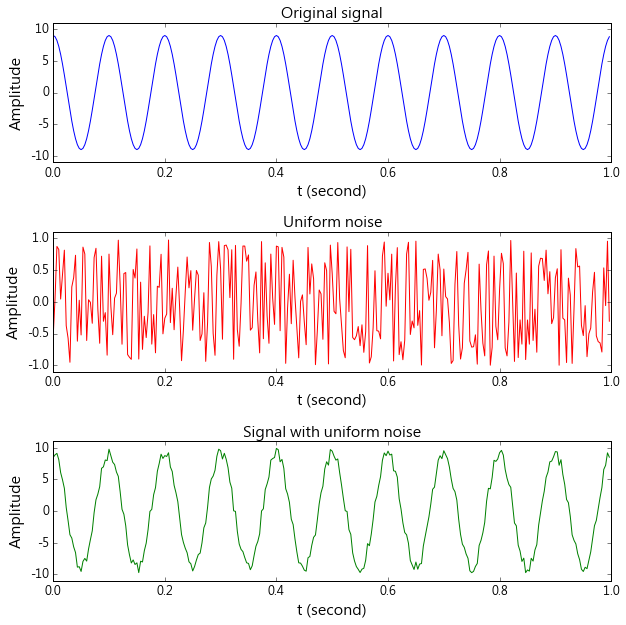

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

def plot_fig(val, title, y_uplim):
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 10))
    plt.subplots_adjust(hspace = 0.5)
    color = ["blue", "red", "green"]
    
    for i in range(3):
        axes[i].plot(t, val[i], color[i], lw = 1)
        axes[i].set_xlim(0, 1)
        axes[i].set_ylim(-y_uplim[i], y_uplim[i])
        axes[i].set_xlabel("t (second)", fontsize = 15)
        axes[i].set_ylabel("Amplitude", fontsize = 15)
        axes[i].set_title(title[i], fontsize = 15)
        axes[i].tick_params(axis = 'both', labelsize = 12)

    plt.show()

t = np.linspace(0, 1, 300, endpoint = False)
x = 9 * np.cos(2 * np.pi * 10 * t)
noise = random.uniform(-1, 1, 300)

y = x + noise

val = [x, noise, y]
title = ["Original signal", "Uniform noise", "Signal with uniform noise"]
y_uplim = [11, 1.1, 11]

plot_fig(val, title, y_uplim)

#### (2) Gaussian noise

Given a random variable $z$, the Gaussian distribution function is

$$ p(z)=\frac{1}{\sqrt{2\pi \sigma ^{2}}}e^{-\frac{\left ( z-\mu  \right )^{2}}{2\sigma ^{2}}} $$

where $\mu$ is mean/average, $\sigma$ is the standard deviation and

$$ \int_{-\infty }^{\infty }p\left ( z \right )dz=1 $$



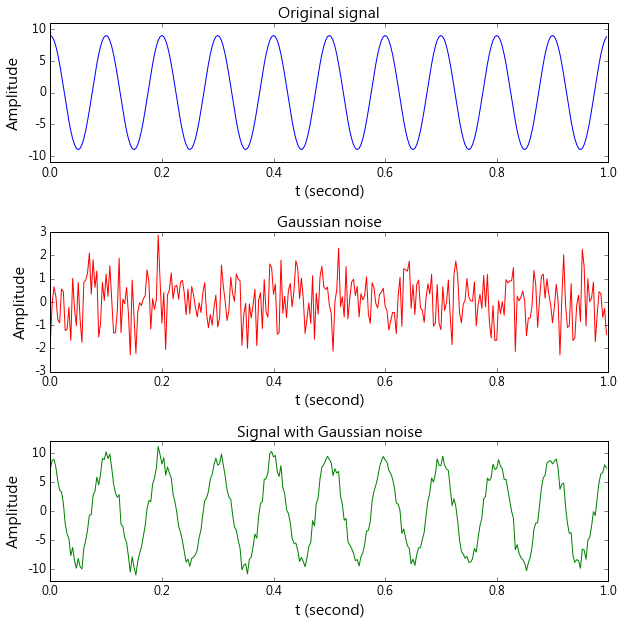

In [2]:
t = np.linspace(0, 1, 300, endpoint = False)
x = 9 * np.cos(2 * np.pi * 10 * t)
noise = random.normal(0, 1, 300)

y = x + noise

val = [x, noise, y]
title = ["Original signal", "Gaussian noise", "Signal with Gaussian noise"]
y_uplim = [11, 3, 12]

plot_fig(val, title, y_uplim)

#### (3) Brownian noise (Brown noise、red noise、random walk noise)

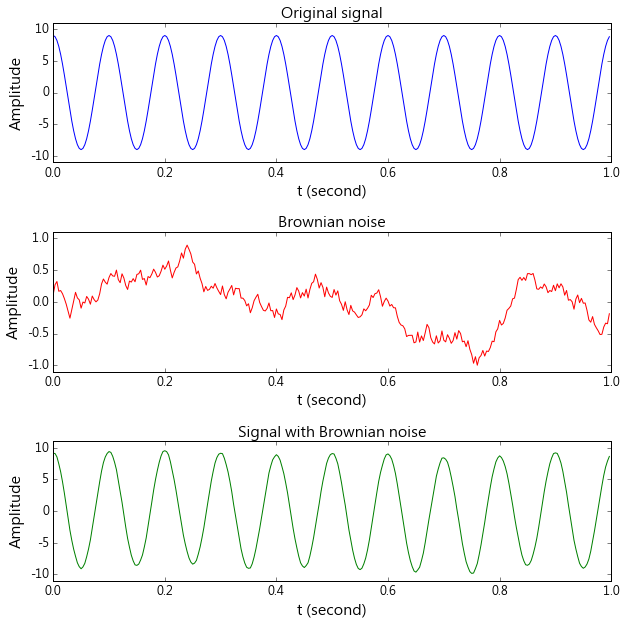

In [3]:
t = np.linspace(0, 1, 300, endpoint = False)
x = 9 * np.cos(2 * np.pi * 10 * t)

n1 = random.uniform(-1, 1, 300)
ns = np.cumsum(n1)
mean = np.mean(ns)
max_val = np.max(np.absolute(ns - mean))
noise = (ns - mean)/max_val

y = x + noise

val = [x, noise, y]
title = ["Original signal", "Brownian noise", "Signal with Brownian noise"]
y_uplim = [11, 1.1, 11]

plot_fig(val, title, y_uplim)

#### (4) Impulse noise

Parameters:

- Amplitude

- Probability

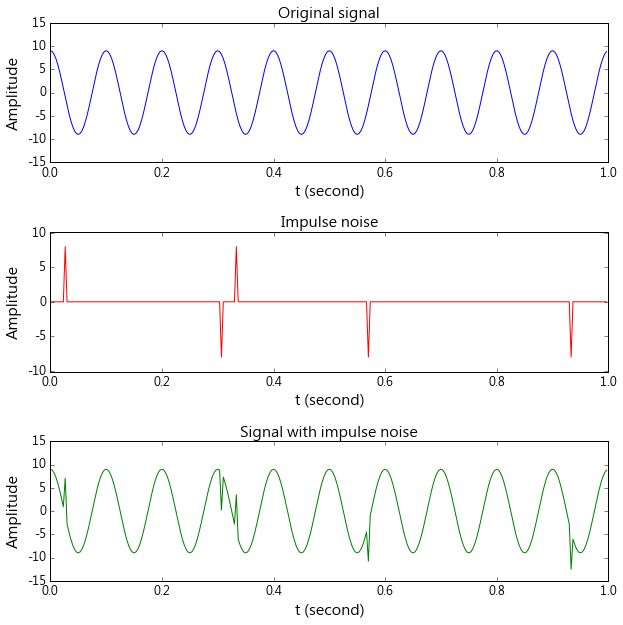

In [4]:
Amp = 8
Prob = 2

t = np.linspace(0, 1, 300, endpoint = False)
x = 9 * np.cos(2 * np.pi * 10 * t)

noise = np.zeros(x.size)

for i in range(x.size):
    p1 = random.uniform(0, 1)
    
    if p1 < Prob/100:
        p2 = random.uniform(0, 1)
        
        if p2 > 0.5:
            noise[i] = Amp
            
        else:
            noise[i] = -Amp

y = x + noise

val = [x, noise, y]
title = ["Original signal", "Impulse noise", "Signal with impulse noise"]
y_uplim = [15, 10.1, 15]

plot_fig(val, title, y_uplim)

### 4. Signal-to-noise ratio (SNR)

$$
SNR = \frac{P_{signal}}{P_{noise}}=\left (\frac{A_{signal}}{A_{noise}} \right )^{2} = 10\log_{10}\left ( \frac{P_{signal}}{P_{noise}} \right ) (dB)=20\log_{10}\left (\frac{A_{signal}}{A_{noise}} \right )(dB)
$$

- $P_{signal}$: signal power


- $P_{noise}$: noise power


- $A_{signal}$: signal amplitude


- $A_{noise}$: noise amplitude

### 5. Save .wav file

In [5]:
import numpy as np
import wave
import struct
import scipy.signal as signal

filename = "Signal_With_Noise.wav"

amplitude = 3000             # range: -32768 ~ 32768 (16-bits)
frequency = 200              # (Hz)
duration = 3                 # (s)
fs = 44100                   # (Hz) (for a common audio file)
num_samples = duration * fs

num_channels = 1
sampwidth = 2
num_frames = num_samples
comptype = "NONE"
compname = "not compressed"

t = np.linspace(0, duration, num_samples, endpoint = False)
x = amplitude * np.cos(2 * np.pi * frequency * t)
noise = random.normal(0, 100, num_samples)

y = x + noise

# Avoid the data overflow
np.clip(y, -32768, 32768)

wav_file = wave.open(filename, 'w')

# Write the header
wav_file.setparams((num_channels, sampwidth, fs, num_frames, comptype, compname))

# Write the signal
for s in y:
    # pack('h', int(s)): it transforms int(s) to 16-bits (2-bytes) format
    wav_file.writeframes(struct.pack('h', int(s)))
    
wav_file.close()